In [1]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.81          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



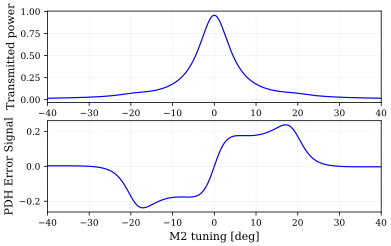

In [2]:
#initialise Finesse with a new empty kat object
basekat = finesse.kat() 
#tell Finesse to talk less
basekat.verbose = False
#parse the Finesse code into PyKat
basekat.parse("""
l laser 1 0 n0

#modulator
s smod 0 n0 nmod1
mod eom 80M 0.3 1 pm nmod1 nmod2
s s0 0 nmod2 n1

#the cavity:
m1 M1 0.15 0 0 n1 n2
s scav 0.2 n2 n3
m1 M2 0.15 0 0 n3 n4

#Gaussian model
attr M1 Rc -0.15
attr M2 Rc 0.15
cav FPcav M1 n2 M2 n3
maxtem 2

#photodiode and xaxis
pd Ptrans n4
pd1 PDH 80M 0 n2
xaxis M2 phi lin -40 40 200
""")

def pltPE(kat,label=None):
    out=kat.run()
    ax1.plot(out.x,out["Ptrans"],label=label)
    ax1.set_ylabel("Transmitted power")
    ax2.plot(out.x,out["PDH"])
    ax2.set_xlabel('M2 tuning [deg]')
    ax2.set_ylabel('PDH Error Signal')
    if label:
        ax1.legend()

fig,(ax1,ax2) =plt.subplots(2,1)
pltPE(basekat)

--------------------------------------------------------------
Running kat - Started at 2022-05-02 19:36:59.125842
Used Finesse 2.3.1 at finesse_linux/kat

Finished in 0.0846713 seconds
% Generated by PyKat 02.05.2022 19:36:59

l laser 30.0 0.0 0.0 n1
s space1 1.0 n1 n2
m M_ITM_AR 0.001 0.999 -1.7763 n2 n3
attr M_ITM_AR Rcx -1.7763
attr M_ITM_AR Rcy 0.0
attr M_ITM_AR xbeta 0.0
attr M_ITM_AR ybeta 0.0
attr M_ITM_AR mass 0.04645
s M_ITM_BULK 0.027 1.45 n3 n4
m M_ITM_HR 0.995 0.005 -5.7 n4 n5
attr M_ITM_HR Rcx -5.7
attr M_ITM_HR Rcy 0.0
attr M_ITM_HR xbeta 0.0
attr M_ITM_HR ybeta 0.0
attr M_ITM_HR mass 0.04645
s space2 10.8 n5 n6
m M_ETM_HR 0.995 0.005 5.7 n6 n7
attr M_ETM_HR Rcx 5.7
attr M_ETM_HR Rcy 0.0
attr M_ETM_HR xbeta 0.0
attr M_ETM_HR ybeta 0.0
attr M_ETM_HR mass 0.04645
s M_ETM_BULK 0.027 1.45 n7 n8
m M_ETM_AR 0.001 0.999 1.7763 n8 n9
attr M_ETM_AR Rcx 1.7763
attr M_ETM_AR Rcy 0.0
attr M_ETM_AR xbeta 0.0
attr M_ETM_AR ybeta 0.0
attr M_ETM_AR mass 0.04645
pd0 pd1 n9
xaxis M_ETM_HR

100% | ETA:  0:00:00 | Calculating                                                                                                                                                                                                         

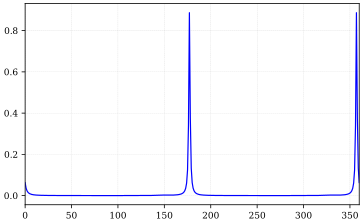

In [4]:
#https://git.ligo.org/finesse/pykat/-/blob/master/examples/cavity_scan.py

import pykat
import pylab as pl
import numpy as np

#######################
# set some parameters #
#######################

parameters = {
	'laser': {
		'power': 30,				# input laser power [W]
		'frequency_offset': 0,
		'phase': 0
	},
	'cavity': {
		'length':	10.8,			# cavity length [m]
		'itm': {				# ITM
			'radius': 0.023225,		# [m]
			'radius_of_curvature': {
				'inner': {		# inner (concave) surface
					'x': -5.7,	# [m]
					'y': -5.7	# [m]
				},
				'outer': {		# outer (convex) surface
					'x': -1.7763,	# [m]
					'y': -1.7763	# [m]
				}
			},
			'thickness': 0.027,		# [m]
			'reflectivity': {		# power reflectivity
				'inner': 0.995,		# inner (concave) surface
				'outer': 0.001		# outer (convex) surface
			},
			'transmission': {		# power transmission
				'inner': 0.005,
				'outer': 0.999
			},
			'tuning_angle': {		# phi
				'inner': 0,
				'outer': 0
			},
			'misalignment': {		# mirror misalignment [rad]
				'inner': {
					'x': 0,
					'y': 0
				},
				'outer': {
					'x': 0,
					'y': 0
				}
			}
		},
		'etm': {				# ETM
			'radius': 0.023225,		# [m]
			'radius_of_curvature': {
				'inner': {		# inner (concave) surface
					'x': 5.7,	# [m]
					'y': 5.7	# [m]
				},
				'outer': {		# outer (convex) surface
					'x': 1.7763,	# [m]
					'y': 1.7763	# [m]
				}
			},
			'thickness': 0.027,		# [m]
			'reflectivity': {		# power reflectivity
				'inner': 0.995,		# inner (concave) surface
				'outer': 0.001		# outer (convex) surface
			},
			'transmission': {		# power transmission
				'inner': 0.005,
				'outer': 0.999
			},
			'tuning_angle': {		# phi
				'inner': 0,
				'outer': 0
			},
			'misalignment': {		# mirror misalignment [rad]
				'inner': {
					'x': 0,
					'y': 0
				},
				'outer': {
					'x': 0,
					'y': 0
				}
			}
		},
	},
	'materials': {
		'bulk': {
			'silica': {
				'refractive_index': 1.45
			}
		}
	}
}

###############################################
# instantiate PyKat object and add components #
###############################################

# instantiate PyKat object
kat = pykat.finesse.kat()

# laser
kat.add(
	pykat.components.laser(
		'laser',					# name
		'n1',						# node
		parameters['laser']['power'],
		parameters['laser']['frequency_offset'],
		parameters['laser']['phase']
	)
)

# add a 1m space between laser and ITM
kat.add(
	pykat.components.space(
		'space1',					# name
		'n1',						# node 1
		'n2',						# node 2
		1						# length [m]
	)
)

##################
# ITM definition #
##################
# This involves three 'components':
#	* a mirror to represent the convex AR surface;
#	* a space representing the thickness of the mirror, with correct refractive index;
#	* a mirror representing the concave HR surface

# AR coating
kat.add(
	pykat.components.mirror(
		'M_ITM_AR',
		'n2',
		'n3',
		parameters['cavity']['itm']['reflectivity']['outer'],
		parameters['cavity']['itm']['transmission']['outer'],
		parameters['cavity']['itm']['tuning_angle']['outer'],
		parameters['cavity']['itm']['radius_of_curvature']['outer']['x'],
		parameters['cavity']['itm']['radius_of_curvature']['outer']['y'],
		parameters['cavity']['itm']['misalignment']['outer']['x'],
		parameters['cavity']['itm']['misalignment']['outer']['y'],
		0,
		parameters['cavity']['itm']['radius'] * 2
	)
)

# bulk mirror material
kat.add(
	pykat.components.space(
		'M_ITM_BULK',
		'n3',
		'n4',
		parameters['cavity']['itm']['thickness'],
		parameters['materials']['bulk']['silica']['refractive_index']
	)
)

# HR coating
kat.add(
	pykat.components.mirror(
		'M_ITM_HR',
		'n4',
		'n5',
		parameters['cavity']['itm']['reflectivity']['inner'],
		parameters['cavity']['itm']['transmission']['inner'],
		parameters['cavity']['itm']['tuning_angle']['inner'],
		parameters['cavity']['itm']['radius_of_curvature']['inner']['x'],
		parameters['cavity']['itm']['radius_of_curvature']['inner']['y'],
		parameters['cavity']['itm']['misalignment']['inner']['x'],
		parameters['cavity']['itm']['misalignment']['inner']['y'],
		0,
		parameters['cavity']['itm']['radius'] * 2
	)
)

##########
# cavity #
##########

kat.add(
	pykat.components.space(
		'space2',
		'n5',
		'n6',
		parameters['cavity']['length']
	)
)

##################
# ETM definition #
##################
# This involves three 'components', just like the ITM definition.

# HR coating
kat.add(
	pykat.components.mirror(
		'M_ETM_HR',
		'n6',
		'n7',
		parameters['cavity']['etm']['reflectivity']['inner'],
		parameters['cavity']['etm']['transmission']['inner'],
		parameters['cavity']['etm']['tuning_angle']['inner'],
		parameters['cavity']['etm']['radius_of_curvature']['inner']['x'],
		parameters['cavity']['etm']['radius_of_curvature']['inner']['y'],
		parameters['cavity']['etm']['misalignment']['inner']['x'],
		parameters['cavity']['etm']['misalignment']['inner']['y'],
		0,
		parameters['cavity']['etm']['radius'] * 2
	)
)

# bulk mirror material
kat.add(
	pykat.components.space(
		'M_ETM_BULK',
		'n7',
		'n8',
		parameters['cavity']['etm']['thickness'],
		parameters['materials']['bulk']['silica']['refractive_index']
	)
)

# AR coating
kat.add(
	pykat.components.mirror(
		'M_ETM_AR',
		'n8',
		'n9',
		parameters['cavity']['etm']['reflectivity']['outer'],
		parameters['cavity']['etm']['transmission']['outer'],
		parameters['cavity']['etm']['tuning_angle']['outer'],
		parameters['cavity']['etm']['radius_of_curvature']['outer']['x'],
		parameters['cavity']['etm']['radius_of_curvature']['outer']['y'],
		parameters['cavity']['etm']['misalignment']['outer']['x'],
		parameters['cavity']['etm']['misalignment']['outer']['y'],
		0,
		parameters['cavity']['etm']['radius'] * 2
	)
)

##############
# photodiode #
##############

# photodiode looking at cavity transmitted light
kat.add(
	pykat.detectors.pd(
		'pd1',
		0,
		'n9'
	)
)

###########################
# Gaussian beam parameter #
###########################

# set q value 1m from ITM, i.e. at the n1 node
# use the utility method for this purpose
kat.space1.n1.q = pykat.optics.gaussian_beams.BeamParam(q = 1.050412 + 24.243836j)
# you can alternatively set w0 and z with gauss_param(w0 = #, z = #)

##############################
# define what we want to see #
##############################

# scan cavity from 0 to 360 degrees
kat.add(pykat.commands.xaxis('lin', [0, 360], kat.M_ETM_HR.phi, 360))

# set maximum TEM mode to model
kat.maxtem = 3

#######################
# run script and plot #
#######################

# run simulation
r = kat.run()

# output the raw FINESSE file that PyKat has generated
scriptList = kat.generateKatScript()
print (''.join(scriptList))

# calculate and print cavity finesse
r1r2 = np.sqrt(parameters['cavity']['itm']['reflectivity']['inner']) * np.sqrt(parameters['cavity']['etm']['reflectivity']['inner'])

finesse = np.pi / (2 * np.arcsin((1 - r1r2) / (2 * np.sqrt(r1r2))))

print ("Cavity finesse: {0:.0f}".format(finesse))

# create plot
pl.plot(r.x, r.y)

# show grid
pl.grid(True)

# set plot limits
pl.xlim((0, 360))

# make plot visible
pl.show()